# DeepLab V3+

In [31]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

import sys
sys.path.append("./deeplabv3/")

from model import Deeplabv3

from keras.preprocessing import image

import matplotlib

In [23]:
def resize_image(image):
    w, h, _ = image.shape
    ratio = float(trained_image_width) / np.max([w, h])
    resized_image = np.array(Image.fromarray(image.astype('uint8')).resize((int(ratio * h), int(ratio * w))))

    resized_image = (resized_image / mean_subtraction_value) - 1.

    pad_x = int(trained_image_width - resized_image.shape[0])
    pad_y = int(trained_image_width - resized_image.shape[1])
    resized_image = np.pad(resized_image, ((0, pad_x), (0, pad_y), (0, 0)), mode='constant')
    return resized_image

def predict_segmentation(resized_image):
    res = deeplab_model.predict(np.expand_dims(resized_image, 0))
    labels = np.argmax(res.squeeze(), -1)

    # remove padding and resize back to original image
    if pad_x > 0:
        labels = labels[:-pad_x]
    if pad_y > 0:
        labels = labels[:, :-pad_y]
    labels = np.array(Image.fromarray(labels.astype('uint8')).resize((h, w)))
    return labels

### Initialization

In [49]:
trained_image_width=512 
mean_subtraction_value=127.5

deeplab_model = Deeplabv3(weights = 'cityscapes', backbone='xception', classes = 19)

166100992/166094648 [==============================] - 89s 1us/step


# Example Images

In [50]:
paths = ["/Users/peterweber/Dropbox/DataScienceMasterUB/_MastersThesis/GitRepoMasterThesis/Notebooks/deeplabv3/imgs/image1.jpg"
        ,"/Users/peterweber/Dropbox/DataScienceMasterUB/_MastersThesis/GitRepoMasterThesis/Notebooks/deeplabv3/imgs/image2.jpg"
        ,"/Users/peterweber/Dropbox/DataScienceMasterUB/_MastersThesis/GitRepoMasterThesis/Notebooks/deeplabv3/imgs/image3.jpg"
        ]

images = []
labels = []
for path in paths:
    img = np.array(image.load_img(path, target_size = (trained_image_width, trained_image_width)))
    images.append(img)
    resized_img = resize_image(img)
    labels.append(predict_segmentation(resized_img))

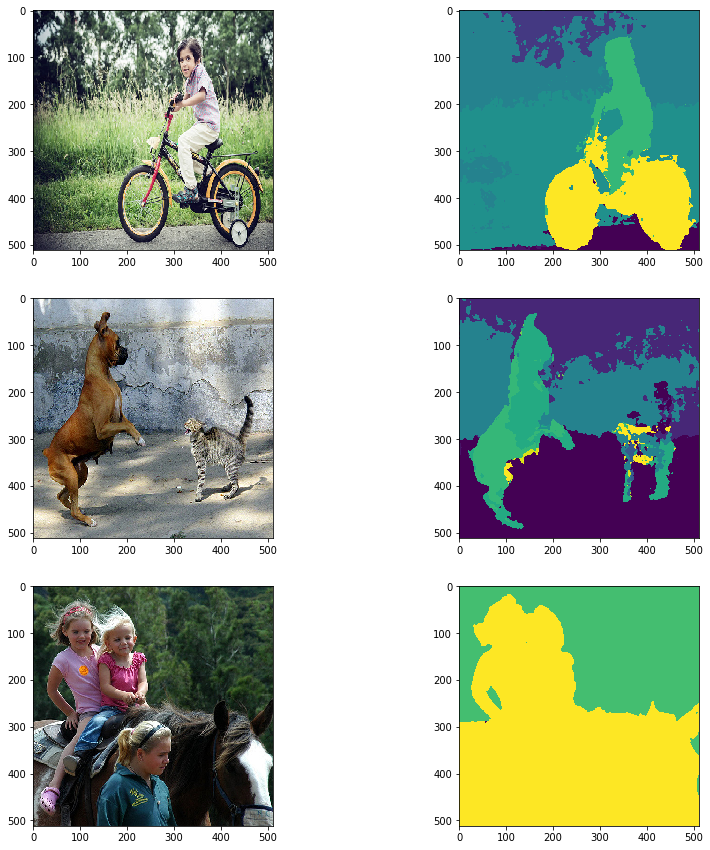

In [51]:
rows = len(paths)

fig = plt.figure(figsize = (14, 5*rows))
for i in range(rows):
    plt.subplot(rows, 2, 2*i + 1)
    plt.imshow(images[i])

    plt.subplot(rows, 2, 2*i + 2)
    plt.imshow(labels[i])
plt.show()

# Images from our data set

In [52]:
paths = ["/Users/peterweber/Google Drive/MFP - Satellogic/images/usgs_512_res0.3m/agriculture/label_2/11ska475620_x4292_y1732_size512_baseres0.3m.png"
        ,"/Users/peterweber/Google Drive/MFP - Satellogic/images/usgs_512_res0.3m/agriculture/label_2/14skc100140_x132_y1156_size512_baseres0.3m.png"
        ,"/Users/peterweber/Google Drive/MFP - Satellogic/images/usgs_512_res0.3m/semi-desert/label_2/1n4e20-2010_x4783_y116_size512_baseres0.3m.png"
        ,"/Users/peterweber/Google Drive/MFP - Satellogic/images/usgs_512_res0.3m/shrubland-grassland/label_2/5343ee-13_x9888_y1696_size512_baseres0.3m.png"
        ]

images = []
labels = []
for path in paths:
    img = np.array(image.load_img(path, target_size = (trained_image_width, trained_image_width)))
    images.append(img)
    resized_img = resize_image(img)
    labels.append(predict_segmentation(resized_img))


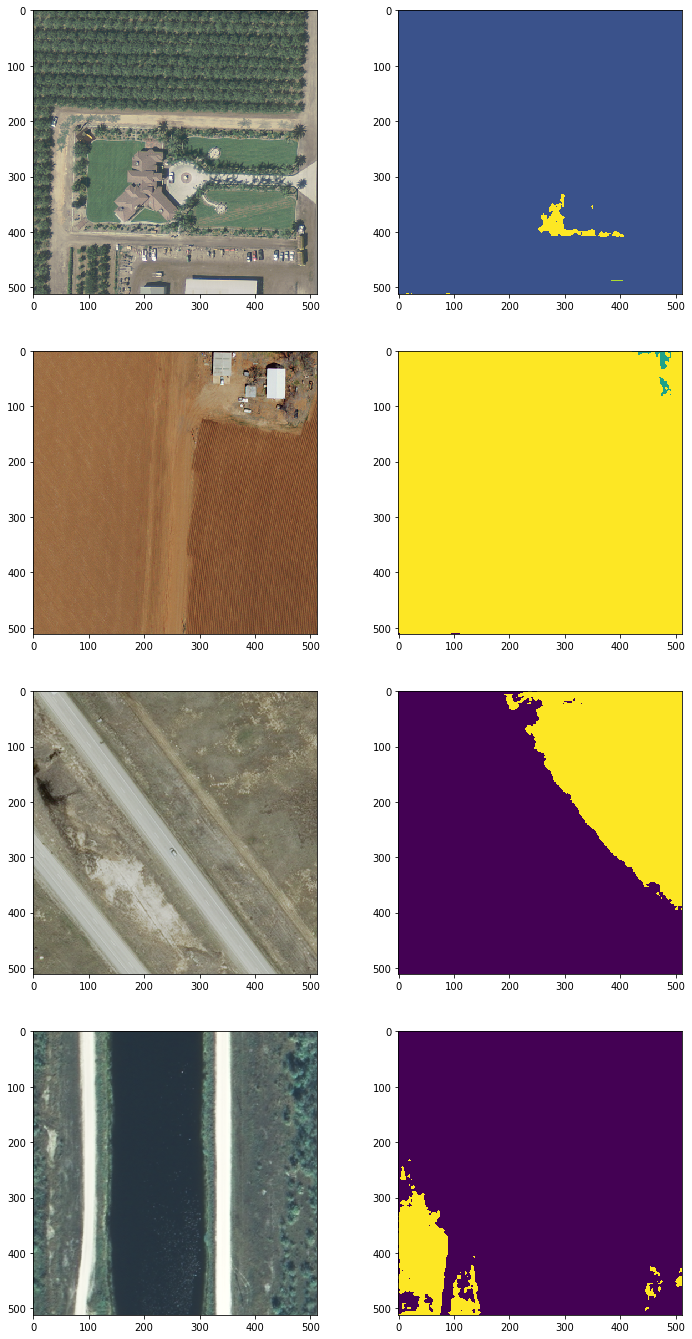

In [53]:
rows = len(paths)

fig = plt.figure(figsize = (12, 6*rows))
for i in range(rows):
    plt.subplot(rows, 2, 2*i + 1)
    plt.imshow(images[i])

    plt.subplot(rows, 2, 2*i + 2)
    plt.imshow(labels[i])
plt.show()